In [1]:
from dataclasses import dataclass
import numpy as np
from numpy import ndarray, float64
import matplotlib.pyplot as plt
import pandas
import scipy


In [ ]:
TABLE1 = np.loadtxt("Data/TTB_Table_1_digitized-2.csv", delimiter=",")
TABLE6 = np.loadtxt("./Data/TTB_Table_6_digitized.csv", delimiter=",", skiprows=10, usecols=[0,1,2,3,4])

In [2]:
@dataclass
class EthanolMeasurement:
    concentration: float64  # %ethanol by mass
    density: ndarray  # g/cm^3
    dtemp: ndarray  # Celsius
    pmass: ndarray  # grams
    ptemp: ndarray  # Celsius


# Data for measurments of various concentrations of ethanol
ethanol00 = EthanolMeasurement(
    concentration=float64(0.0),
    density=np.array([0.9925, 0.9925, 0.9925]),
    dtemp=np.array([23.4, 23.4, 23.4]),
    pmass=np.array([60.346, 60.347, 60.345]),
    ptemp=np.array([24.0, 24.0, 24.0]),
)

ethanol10 = EthanolMeasurement(
    concentration=float64(5.003 / 50.2),
    density=np.array([0.9757, 0.9799, 0.9801]),
    dtemp=np.array([25.7, 25.5, 25.5]),
    pmass=np.array([60.346, 60.347, 60.345]),
    ptemp=np.array([25.2, 25.2, 25.4]),
)

ethanol20 = EthanolMeasurement(
    concentration=float64(10.0 / 50.055),
    density=np.array([0.9627, 0.9652, 0.9657]),
    dtemp=np.array([26.9, 26.8, 26.9]),
    pmass=np.array([59.99, 59.987, 59.985]),
    ptemp=np.array([25.8, 25.6, 25.8]),
)

ethanol30 = EthanolMeasurement(
    concentration=float64(15.0 / 50.285),
    density=np.array([0.9462, 0.9480, 0.9481]),
    dtemp=np.array([27.3, 27.4, 27.4]),
    pmass=np.array([59.609, 59.607, 59.604]),
    ptemp=np.array([25.4, 25.4, 25.2]),
)

ethanol40 = EthanolMeasurement(
    concentration=float64(20.056 / 50.155),
    density=np.array([0.9269, 0.9303, 0.9315]),
    dtemp=np.array([24.8, 24.9, 24.9]),
    pmass=np.array([59.360, 59.031, 59.029]),
    ptemp=np.array([25.0, 25.0, 25.0]),
)

ethanol50 = EthanolMeasurement(
    concentration=float64(25.026 / 50.006),
    density=np.array([0.9085, 0.9078, 0.9081]),
    dtemp=np.array([25.4, 26.0, 26.1]),
    pmass=np.array([58.520, 58.520, 58.519]),
    ptemp=np.array([25.4, 25.6, 25.4]),
)

ethanol60 = EthanolMeasurement(
    concentration=float64(30.028 / 50.175),
    density=np.array([0.8874, 0.8867, 0.8865]),
    dtemp=np.array([25.2, 25.4, 25.5]),
    pmass=np.array([57.958, 57.948, 57.944]),
    ptemp=np.array([24.0, 24.2, 24.3]),
)

ethanol80 = EthanolMeasurement(
    concentration=float64(40.148 / 49.953),
    density=np.array([0.8557, 0.8457, 0.8445]),
    dtemp=np.array([24.0, 24.3, 24.3]),
    pmass=np.array([58.612, 58.613, 58.606]),
    ptemp=np.array([21.5, 22.0, 22.2]),
)

ethanol90 = EthanolMeasurement(
    concentration=float64(45.076 / 50.101),
    density=np.array([0.8156, 0.8153, 0.8152]),
    dtemp=np.array([23.9, 23.9, 24.0]),
    pmass=np.array([57.737, 57.737, 57.739]),
    ptemp=np.array([23.4, 23.4, 23.4]),
)

ethanol_measurments = [
    ethanol00,
    ethanol10,
    ethanol20,
    ethanol30,
    ethanol40,
    ethanol50,
    ethanol60,
    ethanol80,
    ethanol90,
]


@dataclass
class PycnometerMeasurment:
    mass: float64 # in grams
    volume: float64 # in cm^3
    std_volume: float64

    

def new_pycnometer_measurement(
        empty_mass: float64, full_mass: ndarray, water_density: float64
    ) -> PycnometerMeasurment:
        mass = empty_mass
        water_mass = full_mass - empty_mass
        water_volume = water_mass / water_density
        volume = water_volume.mean()
        std_volume = water_volume.std()
        return PycnometerMeasurment(mass, volume, std_volume)

pycnometer1 = new_pycnometer_measurement(
    34.817, np.array([60.505, 60.514, 60.507, 60.508]), 0.9925
)
pycnometer2 = new_pycnometer_measurement(35.844, np.array([62.600, 62.586]), 0.9952)


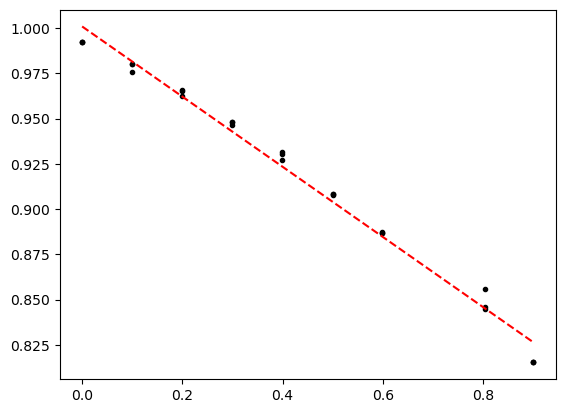

In [3]:
concs = []
for i in ethanol_measurments:
    concs.append(i.concentration)
    concs.append(i.concentration)
    concs.append(i.concentration)
concs = np.array(concs)

densities = []
for i in ethanol_measurments:
    densities.append(i.density[0])
    densities.append(i.density[1])
    densities.append(i.density[2])
densities = np.array(densities)

slope, intercept, rvalue, _, stderr = scipy.stats.linregress(concs, densities)
conc_range = np.linspace(0.0, 0.9, 1000)

plt.plot(concs, densities, "k.")
plt.plot(conc_range, slope * conc_range + intercept, "r--")
plt.show()


In [4]:
def find_nearest(data, value):
    idx = (np.abs(data - value)).argmin()
    return idx

def true_proof(density, temperature):
    #ρ2 = ρ1 (1 + α(T1 − 60◦F))
    #α = 25 × 10−6/◦C 
    #(32°F − 32) × 5/9 = 0°C
    
    alpha = 25e-6
    t1 = (temperature - 32) * (5/9)
    p2 = density * (1 + alpha * (t1 - 60))
    spg2 = p2 / 0.99904
    c2 = np.interp(find_nearest(TABLE6[:, 4], spg2), TABLE6[:, 4], TABLE6[:, 0])
    cr = np.floor(c2)
    tr = np.floor(t1)



In [5]:
true_proof(0.9925, 22)

array([[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  1. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  2. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [204. ,   0. ,   0. , ..., 197.4, 197.2, 196.9],
       [205. ,   0. ,   0. , ..., 198.7, 198.5, 198.3],
       [206. ,   0. ,   0. , ..., 200. , 199.8, 199.6]])